# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [560]:
print("Мы фиксируем сиды в генераторах случайных чисел для того, чтобы сохранялись случайные числа, чтобы эксперименты воспроизводились."
      "Так мы получаем одинаковые случайные значения при каждом запуске кода")

Мы фиксируем сиды в генераторах случайных чисел для того, чтобы сохранялись случайные числа, чтобы эксперименты воспроизводились.Так мы получаем одинаковые случайные значения при каждом запуске кода


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [561]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [562]:
# df_train

In [563]:
# df_train.value_counts(['torque'])

(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [564]:
random_rows = df_train.sample(10)
# random_rows

(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [565]:
top_objects = df_test.head(5) # первые 5
# top_objects

In [566]:
tail_objects = df_test.tail(5) # последние 5
# tail_objects

In [567]:
# df_test.info()

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



Для теста

In [568]:
df_test.describe(include=[np.number])

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [569]:
df_test.describe(include=[np.object_])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


Для трейна

In [570]:
df_train.describe(include=[np.number])

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [571]:
df_train.describe(include=[np.object_])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [572]:
missing_values_train = df_train.isnull().sum()
# missing_values_train

In [573]:
missing_values_test = df_test.isnull().sum()
# missing_values_test

Ответ: пропуски есть только в столбцах mileage и engine

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [574]:
df_train_no_price = df_train.drop(['selling_price'], axis=1) # удалим таргет
# df_train_no_price

In [575]:
dup_rows = df_train_no_price.duplicated()
# dup_rows

In [576]:
dup_rows.sum() # посчитаем кол-во дубликатов

1159

In [577]:
duplicateRows = df_train_no_price[dup_rows] # выведем строки с дубликатами
# duplicateRows

In [578]:
copy_cond = df_train_no_price['name'] == 'Lexus ES 300h' # Например, проверим, что объект Lexus ES 300h повторяется в датасете
# copy_cond

In [579]:
rows = df_train_no_price[copy_cond]
# rows

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [580]:
duplicateRows = df_train_no_price[dup_rows] # выведем строки с дубликатами
# duplicateRows

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

Для трейна

In [581]:
df_train.shape

(6999, 13)

In [582]:
columns_check_duplicates = df_train.columns.difference(['selling_price']) # исключим столбец с ценой
columns_check_duplicates

Index(['engine', 'fuel', 'km_driven', 'max_power', 'mileage', 'name', 'owner',
       'seats', 'seller_type', 'torque', 'transmission', 'year'],
      dtype='object')

In [583]:
df_no_duplicates = df_train.drop_duplicates(subset=columns_check_duplicates, keep='first')
# df_no_duplicates

In [584]:
assert df_no_duplicates.shape == (5840, 13)
# assert df_train.shape == (5840, 13)

In [585]:
dup_check = df_no_duplicates.duplicated() # проверка, удалились ли дубликаты
dup_check.sum()

0

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [586]:
# df_no_duplicates # вроде как нет проблем с индексами

In [587]:
df_train_no_duplicates_new = df_no_duplicates.reset_index(drop=True) # обновим их на всякий случай
# df_train_no_duplicates_new

Проверим, есть ли в df_test дубликаты и обработаем их тоже

In [588]:
test_check = df_test.duplicated() # проверка на дубликаты в тесте
test_check.sum()

62

In [589]:
df_test.shape

(1000, 13)

In [590]:
check_duplicates_test = df_test.columns.difference(['selling_price']) # исключим столбец с ценой
dftest_no_duplicates = df_test.drop_duplicates(subset=check_duplicates_test, keep='first')
df_test_no_duplicates_new = dftest_no_duplicates.reset_index(drop=True) # обновим их на всякий случай
# df_test_no_duplicates_new

In [591]:
df_test_no_duplicates_new.shape

(931, 13)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами: df_train_no_duplicates_new, df_test_no_duplicates_new

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [592]:
#df_train_no_duplicates_new, df_test_no_duplicates_new

обработаем признак engine

In [593]:
# df_train_no_duplicates_new['engine']

In [594]:
engine_units = df_train_no_duplicates_new['engine'].str.extract(r'(\b[A-Za-z]+)\b', expand=False).unique()
engine_units # видим, что в этом признаке только одна единица измерение, значит, ее можно просто удалить

array(['CC', nan], dtype=object)

In [595]:
# engine_units_t = df_test_no_duplicates_new['engine'].str.extract(r'(\b[A-Za-z]+)\b', expand=False).unique()
# engine_units_t

обработаем признак max_power

In [596]:
# df_train_no_duplicates_new['max_power']

In [597]:
max_power_units = df_train_no_duplicates_new['max_power'].str.extract(r'(\b[A-Za-z]+)\b', expand=False).unique()
max_power_units # также зафиксируем 1 единицу измерения в этом признаке

array(['bhp', nan], dtype=object)

In [598]:
# max_power_units_t = df_test_no_duplicates_new['max_power'].str.extract(r'(\b[A-Za-z]+)\b', expand=False).unique()
# max_power_units_t

обработаем признак mileage

In [599]:
# df_train_no_duplicates_new['mileage']

Переведем колонку mileage в одну единицу измерения - в kmpl по правилу:
Чтобы перевести расход топлива из "km/kg" в "kmpl", нужно разделить значение в "km/kg" на приблизительный коэффициент 1.56.
17.3 km/kg / 1.56 ≈ 11.09 kmpl

In [600]:
df_train_no_duplicates_new['mileage'] = df_train_no_duplicates_new['mileage'].str.lower()
# Разделить строки с "km/kg" на 1.56, если подстрока есть
mask = df_train_no_duplicates_new['mileage'].notna() & df_train_no_duplicates_new['mileage'].str.contains('km/kg')
df_train_no_duplicates_new.loc[mask, 'mileage'] = df_train_no_duplicates_new.loc[mask, 'mileage'].str.replace('km/kg', '').astype(float) / 1.56
# df_train_no_duplicates_new['mileage']

In [601]:
df_train_no_duplicates_new['mileage'] = df_train_no_duplicates_new['mileage'].apply(lambda x: pd.to_numeric(re.sub(r'[^\d.]', '', str(x)), errors='coerce') if x is not None else None)
# df_train_no_duplicates_new['mileage'].round(2)

In [602]:
df_train_no_duplicates_new['mileage'] = df_train_no_duplicates_new['mileage'].round(2)
# df_train_no_duplicates_new['mileage']

In [603]:
df_test_no_duplicates_new['mileage'] = df_test_no_duplicates_new['mileage'].str.lower()
# Разделить строки с "km/kg" на 1.56, если подстрока есть
mask = df_test_no_duplicates_new['mileage'].notna() & df_test_no_duplicates_new['mileage'].str.contains('km/kg')
df_test_no_duplicates_new.loc[mask, 'mileage'] = df_test_no_duplicates_new.loc[mask, 'mileage'].str.replace('km/kg','').astype(float) / 1.56
# df_test_no_duplicates_new['mileage']

In [604]:
import re

df_test_no_duplicates_new['mileage'] = df_test_no_duplicates_new['mileage'].apply(
    lambda x: pd.to_numeric(re.sub(r'[^\d.]', '', str(x)), errors='coerce') if x is not None else None)
df_test_no_duplicates_new['mileage'].round(2)
df_test_no_duplicates_new['mileage'] = df_test_no_duplicates_new['mileage'].round(2)
# df_test_no_duplicates_new['mileage']

* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.

In [605]:
# df_train_no_duplicates_new

In [606]:
df_train_no_duplicates_new['engine'] = df_train_no_duplicates_new['engine'].str.replace(r'(\d+(?:\.\d+)?)\s*(\b[A-Za-z]+)\b', r'\1', regex=True).astype(float)

In [607]:
# Применяем регулярное выражение к столбцу 'mileage'
df_train_no_duplicates_new['max_power'] = df_train_no_duplicates_new['max_power'].str.replace(r'(\d+(?:\.\d+)?)\D*', r'\1', regex=True)

# Преобразуем в числовой формат, но устанавливаем значения None, если нет чисел
df_train_no_duplicates_new['max_power'] = pd.to_numeric(df_train_no_duplicates_new['max_power'], errors='coerce')

In [608]:
# df_train_no_duplicates_new.info() # теперь можно видеть, что engine, mileage и max_power обработаны и стали типом float

In [609]:
df_test_no_duplicates_new['engine'] = df_test_no_duplicates_new['engine'].str.replace(
    r'(\d+(?:\.\d+)?)\s*(\b[A-Za-z]+)\b', r'\1', regex=True).astype(float)
# Применяем регулярное выражение к столбцу 'mileage'
df_test_no_duplicates_new['max_power'] = df_test_no_duplicates_new['max_power'].str.replace(r'(\d+(?:\.\d+)?)\D*',
                                                                                              r'\1', regex=True)
# Преобразуем в числовой формат, но устанавливаем значения None, если нет чисел
df_test_no_duplicates_new['max_power'] = pd.to_numeric(df_test_no_duplicates_new['max_power'], errors='coerce')
# df_test_no_duplicates_new.info()  # теперь можно видеть, что engine, mileage и max_power обработаны и стали типом float

обработаем признак torque
Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [610]:
# df_train_no_duplicates_new

In [611]:
# df_train_no_duplicates_new['torque']

In [612]:
# переименуем колонку torque на torque_old для удобства
df_train_no_duplicates_new.rename(columns={'torque': 'torque_old'}, inplace=True)
# df_train_no_duplicates_new

In [613]:
# Создание новых столбцов 'torque' и 'max_torque_rpm' и разделение значений
df_train_no_duplicates_new[['torque', 'max_torque_rpm']] = df_train_no_duplicates_new['torque_old'].str.extract(r'(.+?)\s*[@|\b(?:at)\b|\/]\s*(.*)', expand=True)
df_train_no_duplicates_new['torque'] = df_train_no_duplicates_new['torque'].apply(lambda x: x.lower() if pd.notnull(x) else x)
df_train_no_duplicates_new['max_torque_rpm'] = df_train_no_duplicates_new['max_torque_rpm'].apply(lambda x: x.lower() if pd.notnull(x) else x)
# Отобразить результат
# df_train_no_duplicates_new[['torque_old','torque', 'max_torque_rpm']]

In [614]:
# переименуем колонку torque на torque_old для удобства
df_test_no_duplicates_new.rename(columns={'torque': 'torque_old'}, inplace=True)
# df_test_no_duplicates_new

In [615]:
# Создание новых столбцов 'torque' и 'max_torque_rpm' и разделение значений
df_test_no_duplicates_new[['torque', 'max_torque_rpm']] = df_test_no_duplicates_new['torque_old'].str.extract(
    r'(.+?)\s*[@|\b(?:at)\b|\/]\s*(.*)', expand=True)
df_test_no_duplicates_new['torque'] = df_test_no_duplicates_new['torque'].apply(
    lambda x: x.lower() if pd.notnull(x) else x)
df_test_no_duplicates_new['max_torque_rpm'] = df_test_no_duplicates_new['max_torque_rpm'].apply(
    lambda x: x.lower() if pd.notnull(x) else x)
# Отобразить результат
# df_test_no_duplicates_new[['torque_old', 'torque', 'max_torque_rpm']]

Переведем все значения колонки torque в одну единицу измерения - nm
Для перевода 22.4 kgm в Nm нужно умножить значение на ускорение свободного падения на Земле, которое приблизительно равно 9.81 м/с²:
22.4 kgm × 9.81 m/s² ≈ 219.744 Nm

Переведем в одну единицу измерения

In [616]:
df_train_no_duplicates_new['torque'] = df_train_no_duplicates_new['torque'].str.lower()
mask2 = df_train_no_duplicates_new['torque'].notna() & df_train_no_duplicates_new['torque'].str.contains('kgm')
df_train_no_duplicates_new.loc[mask2, 'torque'] = df_train_no_duplicates_new.loc[mask2, 'torque'].str.replace('kgm', '').astype(float) * 9.81
# df_train_no_duplicates_new['torque']

In [617]:
df_train_no_duplicates_new['torque'] = df_train_no_duplicates_new['torque'].apply(
    lambda x: pd.to_numeric(re.sub(r'[^\d.]', '', str(x)), errors='coerce') if x is not None else None)
df_train_no_duplicates_new['torque'] = df_train_no_duplicates_new['torque'].round(2)
# df_train_no_duplicates_new['torque']

In [618]:
df_test_no_duplicates_new['torque'] = df_test_no_duplicates_new['torque'].str.lower()
mask4 = df_test_no_duplicates_new['torque'].notna() & df_test_no_duplicates_new['torque'].str.contains('kgm')
df_test_no_duplicates_new.loc[mask4, 'torque'] = df_test_no_duplicates_new.loc[mask4, 'torque'].str.replace('kgm','').astype(float) * 9.81
# df_test_no_duplicates_new['torque']

In [619]:
df_test_no_duplicates_new['torque'] = df_test_no_duplicates_new['torque'].apply(
    lambda x: pd.to_numeric(re.sub(r'[^\d.]', '', str(x)), errors='coerce') if x is not None else None)
df_test_no_duplicates_new['torque'] = df_test_no_duplicates_new['torque'].round(2)
# df_test_no_duplicates_new['torque']

Обработаем также случаи вида 4,500(kgm@ rpm) в колонке max_torque_rpm

In [620]:
# df_train_no_duplicates_new

In [621]:
mask = (df_train_no_duplicates_new['torque'].notna()) & (df_train_no_duplicates_new['max_torque_rpm'].notna()) & df_train_no_duplicates_new['max_torque_rpm'].str.contains('kgm')
df_train_no_duplicates_new.loc[mask, 'torque'] *= 9.81
# df_train_no_duplicates_new

In [622]:
# обработаем max_torque_rpm: такого вида 1500-2500
df_train_no_duplicates_new['max_torque_rpm'] = df_train_no_duplicates_new['max_torque_rpm'].str.replace('[^-\d~]', '', regex=True)
# df_train_no_duplicates_new['max_torque_rpm']

In [623]:
# Разделить строки с символами "-" или "~" на два числа и взять среднее
def mean_find(value):
    if pd.notna(value):
        if '-' in value:
            start, end = map(float, value.split('-'))
            return (start + end) / 2
        elif '~' in value:
            start, end = map(float, value.split('~'))
            return (start + end) / 2
        else:
            return float(value)
    else:
        return None

# Применить функцию к колонке и создать новую колонку
df_train_no_duplicates_new['max_torque_rpm'] = df_train_no_duplicates_new['max_torque_rpm'].apply(mean_find)
# df_train_no_duplicates_new['max_torque_rpm']

In [624]:
# убедимся что все нужные признаки переведены во float и преобразованы
# df_train_no_duplicates_new.info()

In [625]:
#удалим torque_old
df_train_no_duplicates_new = df_train_no_duplicates_new.drop('torque_old', axis=1)
# df_train_no_duplicates_new

доделаем тест

In [626]:
# df_test_no_duplicates_new

In [627]:
mask5 = (df_test_no_duplicates_new['torque'].notna()) & (df_test_no_duplicates_new['max_torque_rpm'].notna()) & \
       df_test_no_duplicates_new['max_torque_rpm'].str.contains('kgm')
df_test_no_duplicates_new.loc[mask5, 'torque'] *= 9.81
# df_test_no_duplicates_new

In [628]:
# #обработаем max_torque_rpm
df_test_no_duplicates_new['max_torque_rpm'] = df_test_no_duplicates_new['max_torque_rpm'].str.replace('[^-\d~]', '', regex=True)
# df_test_no_duplicates_new['max_torque_rpm']

In [629]:
# Применить функцию к колонке и создать новую колонку
df_test_no_duplicates_new['max_torque_rpm'] = df_test_no_duplicates_new['max_torque_rpm'].apply(mean_find)
# df_test_no_duplicates_new['max_torque_rpm']

In [630]:
# убедимся что все нужные признаки переведены во float и преобразованы
# df_test_no_duplicates_new.info()
#удалим torque_old
df_test_no_duplicates_new = df_test_no_duplicates_new.drop('torque_old', axis=1)
# df_test_no_duplicates_new

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [631]:
# Выделите числовые признаки
numerical_features = df_train_no_duplicates_new.select_dtypes(include=['float64', 'int64']).columns
# Рассчитайте медиану только для числовых признаков
medians = df_train_no_duplicates_new[numerical_features].median()
# Примените заполнение пропусков медианами к числовым признакам
df_train_no_duplicates_new[numerical_features] = df_train_no_duplicates_new[numerical_features].fillna(medians)

In [632]:
# Проверить, что после заполнения пропусков не осталось
missing_values_after_fill = df_train_no_duplicates_new.isnull().sum()
# missing_values_after_fill # теперь нет пропусков

In [633]:
# Примените медиану тренировочных данных к пропускам в тестовых данных
df_test_no_duplicates_new[numerical_features] = df_test_no_duplicates_new[numerical_features].fillna(medians)
# Проверить, что после заполнения пропусков не осталось
missing_values_after_fill_test = df_test_no_duplicates_new.isnull().sum()
# missing_values_after_fill_test # теперь нет пропусков


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [634]:
print("seats удобно перевести в категориальный признак, потому что есть ограниченное кол-во значений. Кол-во сидений не имеет непрерывной шкалы значений как например возраст. Также кол-во сидений может быть связано с каким-то конкретным видом (классом) авто, то здесь логичнее использовать категориальный признак.")

seats удобно перевести в категориальный признак, потому что есть ограниченное кол-во значений. Кол-во сидений не имеет непрерывной шкалы значений как например возраст. Также кол-во сидений может быть связано с каким-то конкретным видом (классом) авто, то здесь логичнее использовать категориальный признак.


In [635]:
# Преобразовать столбцы "engine" и "seats" к int
df_train_no_duplicates_new['engine'] = df_train_no_duplicates_new['engine'].astype(int)
df_train_no_duplicates_new['seats'] = df_train_no_duplicates_new['seats'].astype(int)
df_test_no_duplicates_new['engine'] = df_test_no_duplicates_new['engine'].astype(int)
df_test_no_duplicates_new['seats'] = df_test_no_duplicates_new['seats'].astype(int)
df_train_no_duplicates_new.info()
df_test_no_duplicates_new['seats'] = df_test_no_duplicates_new['seats'].astype(int)
# df_train_no_duplicates_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  seats           5840 non-null   int64  
 12  torque          5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


In [636]:
# df_train_no_duplicates_new

In [637]:
# df_test_no_duplicates_new

In [638]:
# df_train_no_duplicates_new.info()

In [639]:
# df_test_no_duplicates_new.info()

In [640]:
# перевести seats к категориальным

In [641]:
# узнаем, какие значения есть в стоблце seats
df_train_no_duplicates_new['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])

In [642]:
df_test_no_duplicates_new['seats'].unique()

array([7, 5, 6, 4, 8, 9])

In [643]:
# df_train_no_duplicates_new 

In [644]:
# Определите интервалы для категорий
bins = [1, 4, 7, 10, 14] # определим края интервалов
labels = ['2-4', '5-7', '8-10', '11-14']
df_train_no_duplicates_new_seats = df_train_no_duplicates_new
# Создайте категориальный столбец с интервалами
df_train_no_duplicates_new_seats['seats_category'] = pd.cut(df_train_no_duplicates_new_seats['seats'], bins=bins, labels=labels, right=False)
# Dummy-кодирование категориального столбца
df_train_no_duplicates_new_seats = pd.get_dummies(df_train_no_duplicates_new_seats, columns=['seats_category'], prefix='seat')
# df_train_no_duplicates_new_seats

In [645]:
df_test_no_duplicates_new_seats = df_test_no_duplicates_new
df_test_no_duplicates_new_seats['seats_category'] = pd.cut(df_test_no_duplicates_new_seats['seats'], bins=bins, labels=labels, right=False)
df_test_no_duplicates_new_seats = pd.get_dummies(df_test_no_duplicates_new_seats, columns=['seats_category'], prefix='seat')
# df_test_no_duplicates_new_seats

In [646]:
# df_test_no_duplicates_new

In [647]:
# df_train_no_duplicates_new

In [648]:
df_train2 = df_train_no_duplicates_new.drop('seats_category', axis=1)
# df_train2

In [649]:
df_test2 = df_test_no_duplicates_new.drop('seats_category', axis=1)
# df_test2

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [650]:
import seaborn as sns
import matplotlib.pyplot as plt

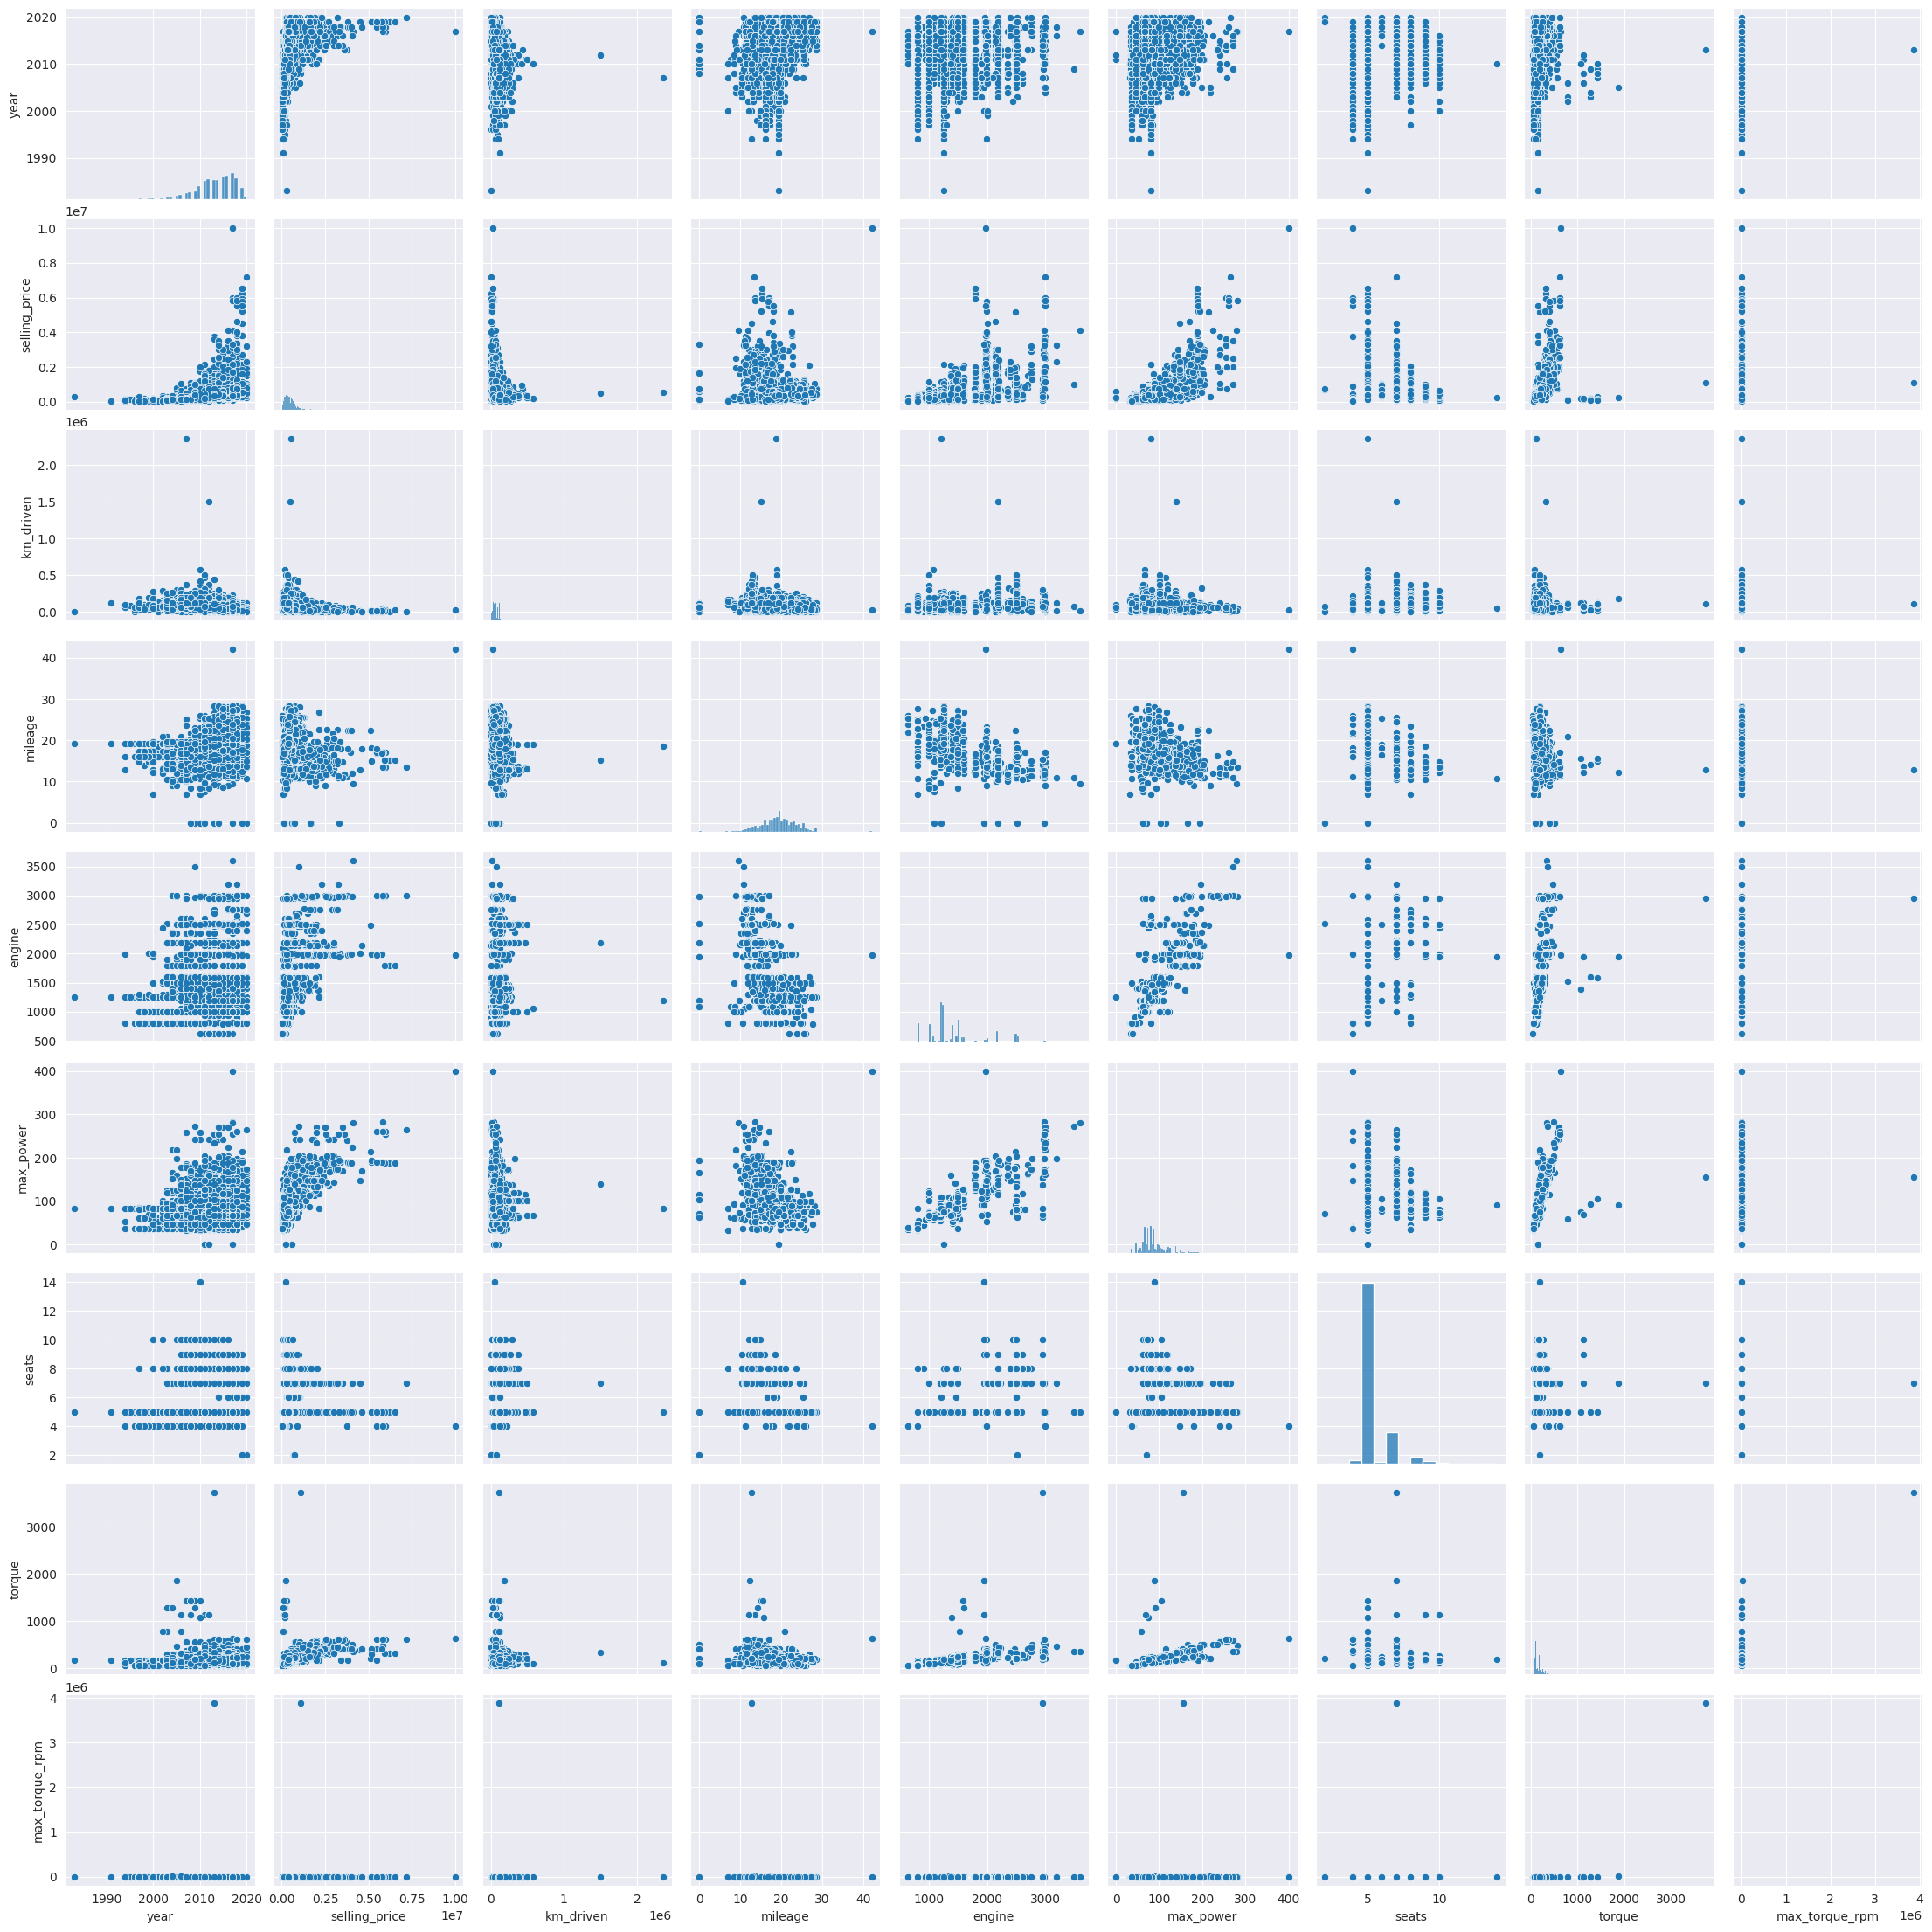

In [651]:
sns.pairplot(df_train_no_duplicates_new)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

- selling_price - year: чем позже выпущено авто, тем выше цена
- km_driven: чем больше km_driven, тем меньше цена
- mile_age: чем меньше пробег, тем выше стоимость авто
- engine: бОльший объем двигателя увеличивает стоимость
- max_power: авто с более мощными двигателями стоят дороже
- seats: чем меньше сидений, тем больше стоимость
- torque и max_torque_rpm не сильно влияют на стоимость авто

Некоторые корреляции:
- engine - mileage: чем меньше пробег, тем больше объем двигателя. Это может происходить из-за массы авто. Авто с бОльшим объемом двигателя тяжелее и это может влиять на эффективность
- mileage - max_power: с уменьшением пробега увеличивается макс мощность, что влияет на стоимость авто
- mileage - seats: с уменьшением пробега становится больше сидений
- mileage - torque: меньший пробег связан с более эффективной работой двигателя при оборотах
- engine - max_power: бОльший объем двигателя связан с более высокой макс мощностью

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

Совокупности похожи, имеют незначительные отличия из-за размера

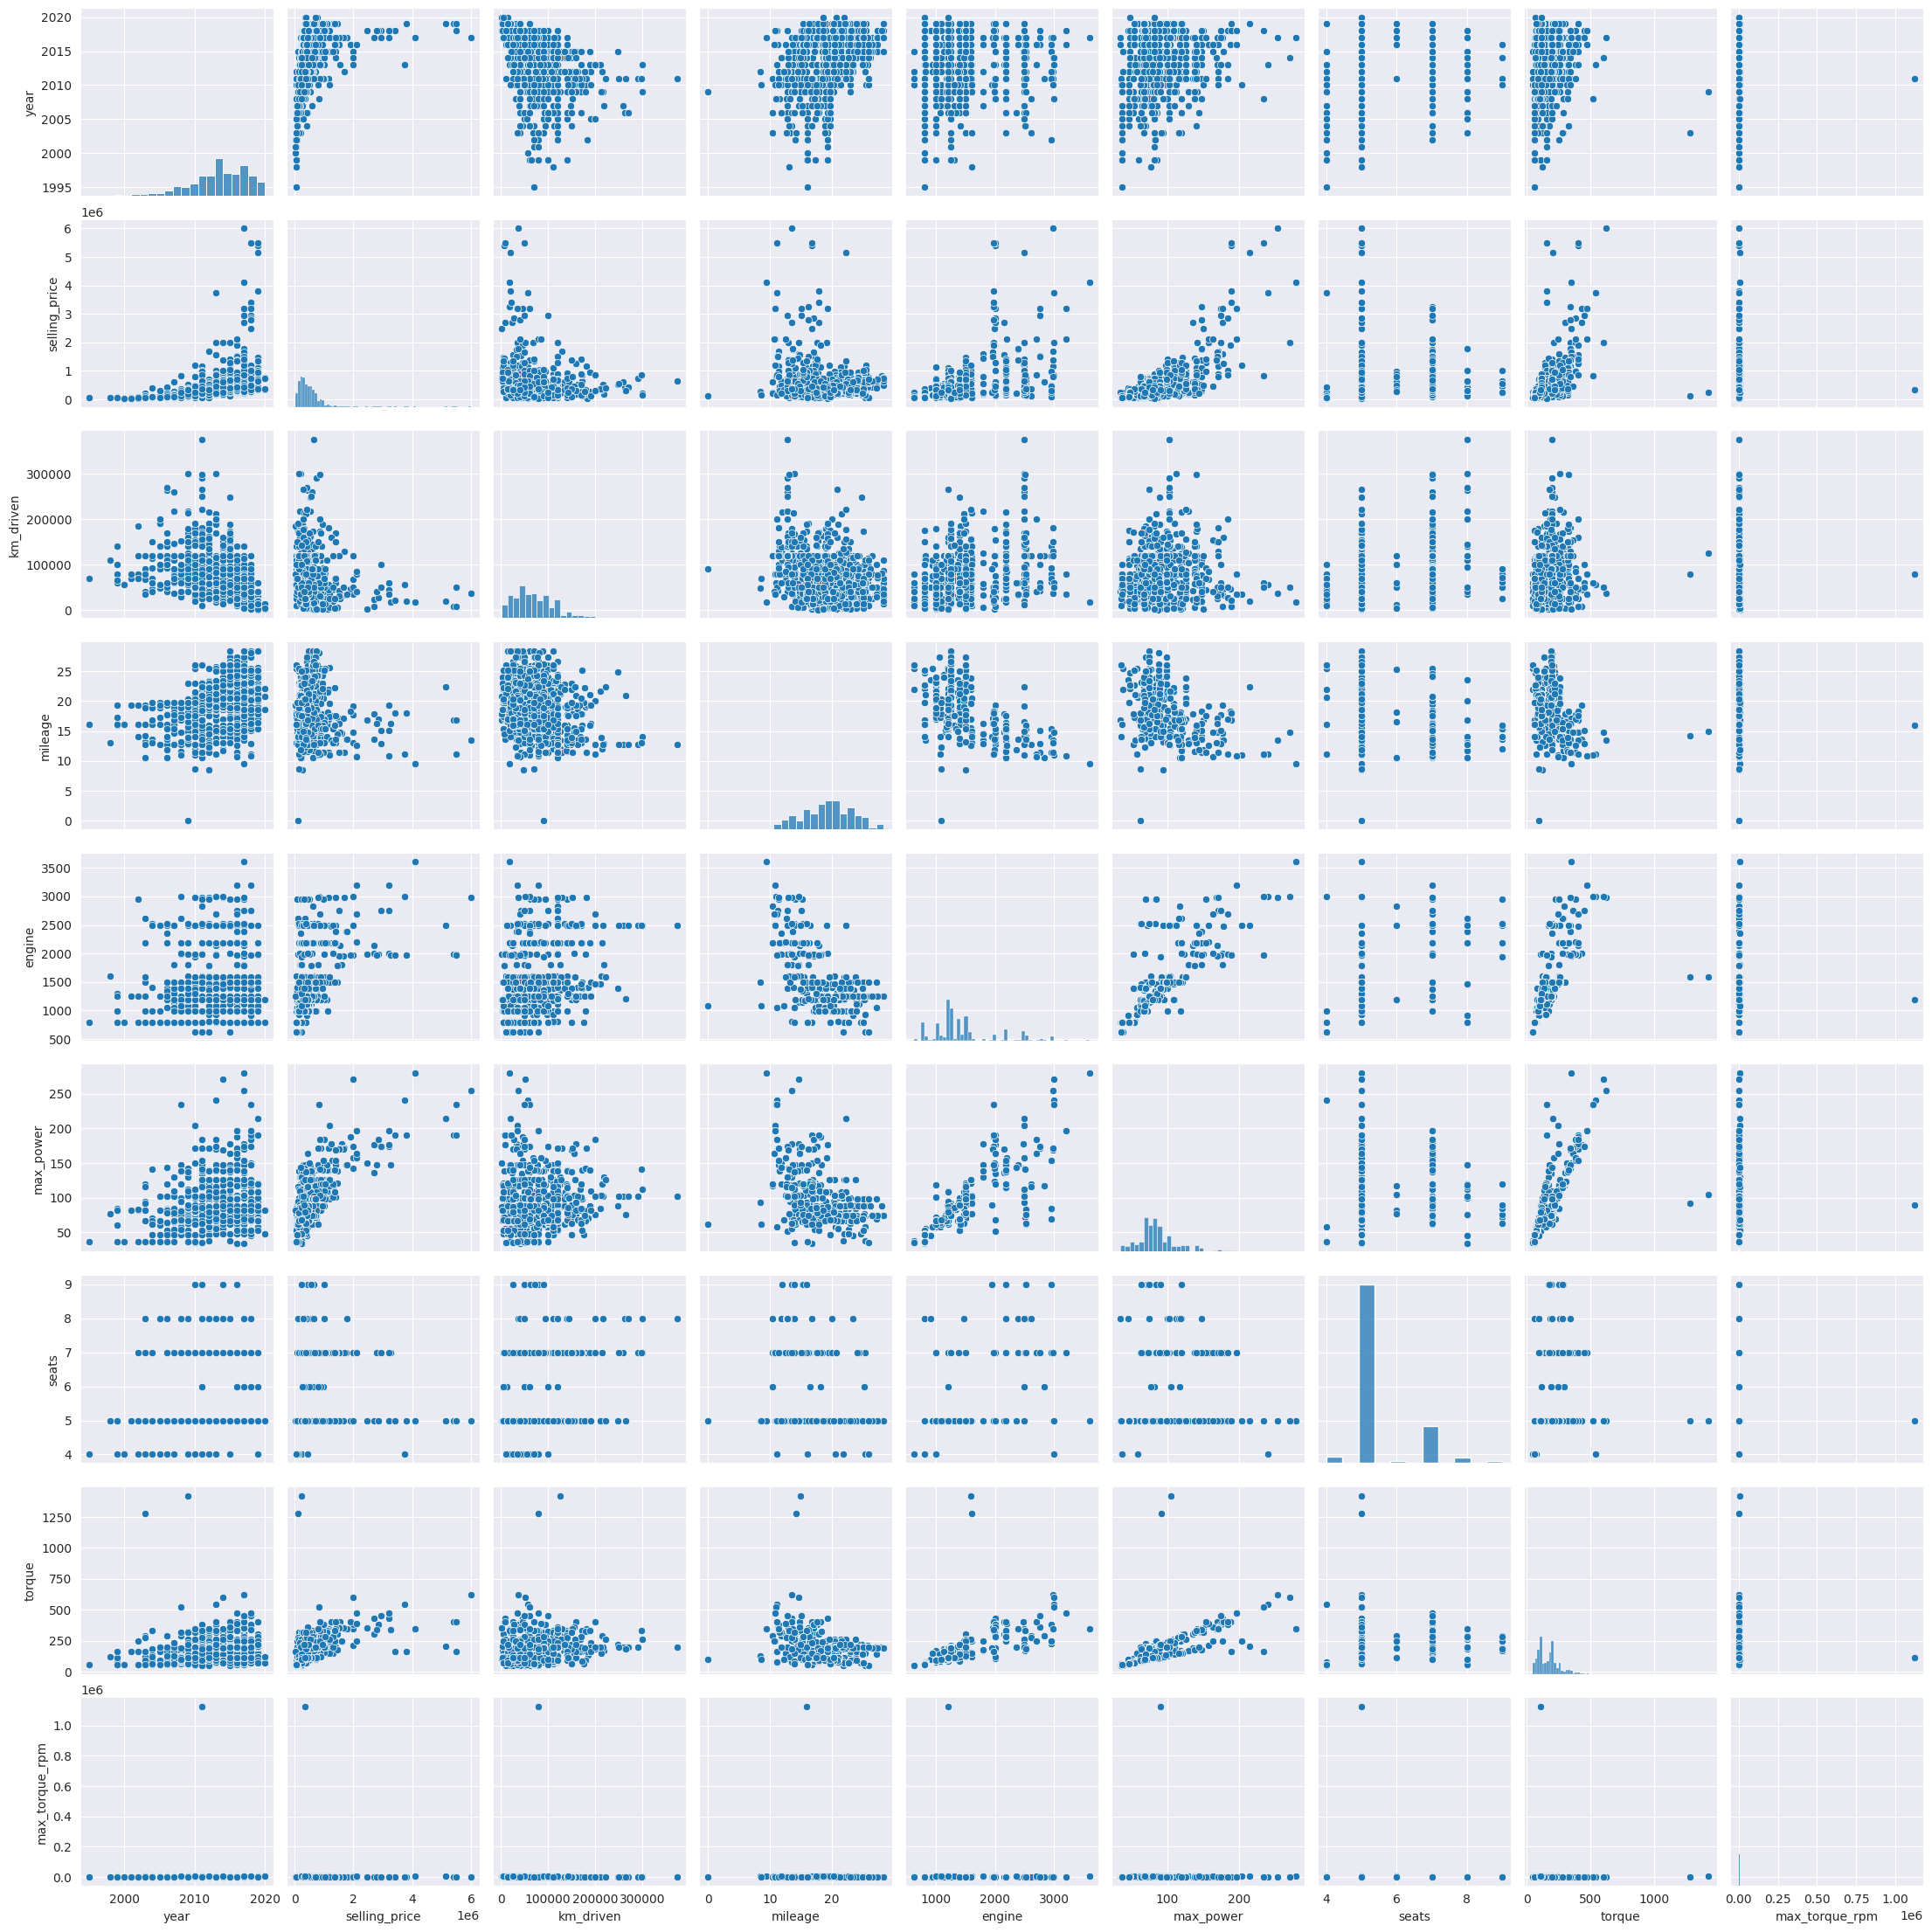

In [652]:
sns.pairplot(df_test_no_duplicates_new)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

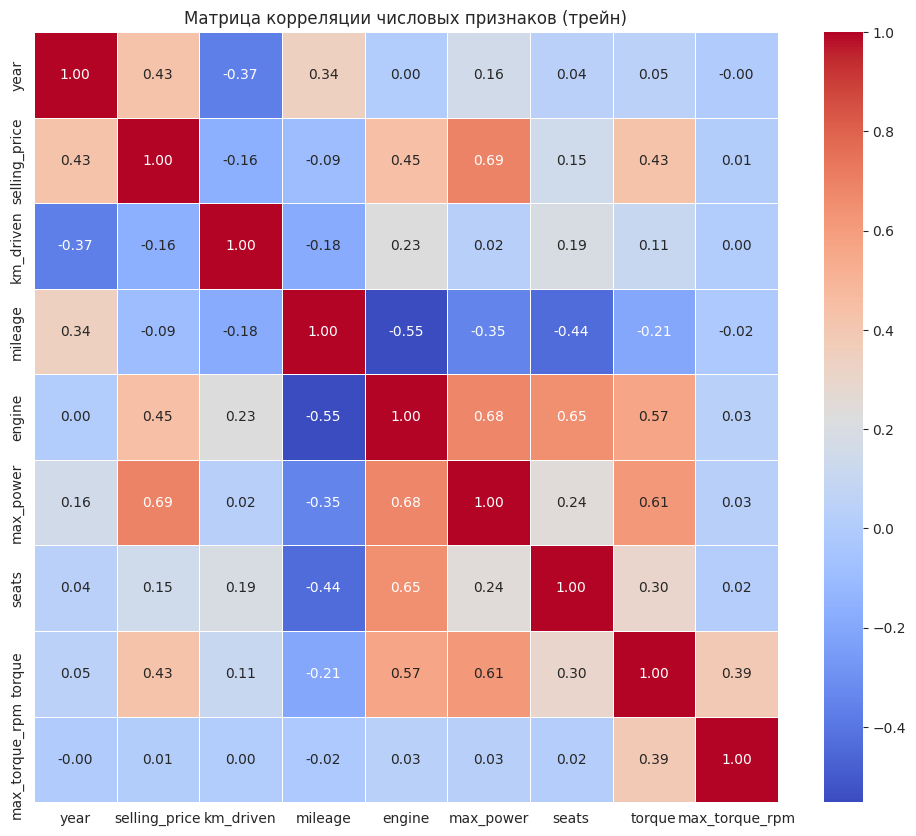

In [653]:
# только числовые признаки
numerical_features = df_train_no_duplicates_new.select_dtypes(include=['float64', 'int64'])
# Вычислите матрицу корреляции
correlation_matrix = numerical_features.corr()
# Визуализируйте матрицу корреляции с использованием heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Матрица корреляции числовых признаков (трейн)")
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>

Меньше всего скоррелированы km_driven и max_torque = 0; year и engine = 0
Это происходит, возможно, потому что это почти независимые характеистики. Объем двигателя, крутящий момент определяют технические хар-ки, тогда как год выпуска и km_driven зависят от других факторов

* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>

engine - seats: 0.65
max_power - engine: 0.68
Многоместные авто, навпример, внедорожники имеютболее мощный двигатель и обычно крупнее и имеют больше сидений
Объем двигателя влияет на макс мощность
Чем больше объем двигателя, тем более высокая мощность

* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Да, корреляция отрицательна и = -0.37


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

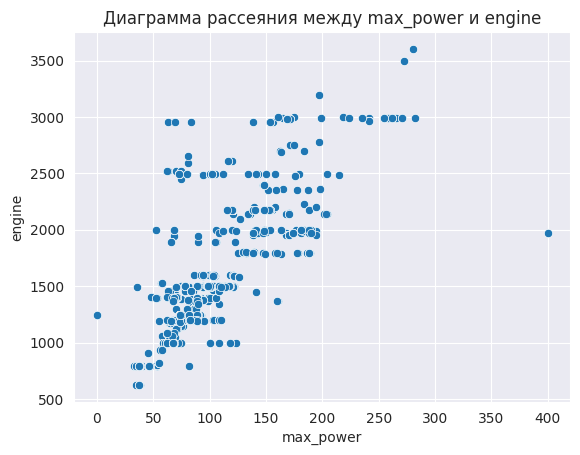

In [654]:
sns.scatterplot(x='max_power', y='engine', data=df_train_no_duplicates_new)
plt.title('Диаграмма рассеяния между max_power и engine')
plt.show()

Объем двигателя влияет на макс мощность
Чем больше объем двигателя, тем более высокая мощность

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Наиболее отрицательная корреляция наблюдается у engine и mileage = -0.55
Возможно, авто с более мощными двигателями потребляет больше топлива на единицу пройденного расстояния и поэтому имеют более низкую эффективность топливопотребления

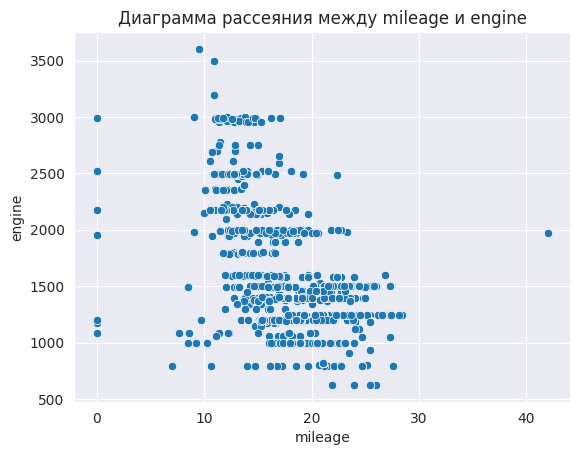

In [655]:
sns.scatterplot(x='mileage', y='engine', data=df_train_no_duplicates_new)
plt.title('Диаграмма рассеяния между mileage и engine')
plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [656]:
# df_train_no_duplicates_new_seats.info()

In [657]:
y_train = df_train_no_duplicates_new_seats['selling_price']
y_test = df_test_no_duplicates_new_seats['selling_price']

In [658]:
# df_train_no_duplicates_new_seats

In [659]:
df_train_no_duplicates_new_seats.drop('selling_price', axis=1, inplace=True)
df_test_no_duplicates_new_seats.drop('selling_price', axis=1, inplace=True)
# Удаляем категориальные столбцы (за исключением 'seats') из тренировочных и тестовых данных
categorical_columns = [col for col in df_train_no_duplicates_new_seats.columns if df_train_no_duplicates_new_seats[col].dtype == 'object' and col != 'seat2-4' and col != 'seat5-7' and col != 'seat8-10' and col != 'seat11-14']
df_train_no_duplicates_new_seats.drop(categorical_columns, axis=1, inplace=True)
df_test_no_duplicates_new_seats.drop(categorical_columns, axis=1, inplace=True)

In [660]:
X_train = df_train_no_duplicates_new_seats
X_test = df_test_no_duplicates_new_seats

In [661]:
# assert X_train.shape == (5840, 6) # осталось 8 числовых признаков, кол-во рядов совпадает

In [662]:
X_train.shape

(5840, 12)

In [663]:
# assert X_test.shape == (1000, 6)

In [664]:
X_test.shape

(931, 12)

In [665]:
X_train.drop('seats', axis=1, inplace=True)
# X_train

In [666]:
X_test.drop('seats', axis=1, inplace=True)
# X_test

In [667]:
seats_int = X_train.filter(like = 'seat')
X_train[seats_int.columns] = seats_int.astype(int)
seats_int = X_test.filter(like = 'seat')
X_test[seats_int.columns] = seats_int.astype(int)

In [668]:
X_test = X_test.drop('seat_11-14', axis=1)
# X_test # Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [669]:
X_train = X_train.drop('seat_11-14', axis=1) # 

In [670]:
# X_train

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [671]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [672]:
# Инициализация линейной регрессии
linear_reg = LinearRegression()

In [673]:
# Обучение модели на тренировочных данных
linear_reg.fit(X_train, y_train)

LinearRegression()

In [674]:
# Предсказание на тренировочных и тестовых данных
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

In [675]:
# Вычисление R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [676]:
y_train.shape

(5840,)

In [677]:
y_train_pred.shape

(5840,)

In [678]:
y_test.shape

(931,)

In [679]:
y_test_pred.shape

(931,)

In [680]:
# Вычисление MSE
mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

In [681]:
print(f'R^2 на тренировочных данных: {r2_train}')
print(f'R^2 на тестовых данных: {r2_test}')
print(f'MSE на тренировочных данных: {mse_train}')
print(f'MSE на тестовых данных: {mse_test}')

R^2 на тренировочных данных: 0.5915361636958711
R^2 на тестовых данных: 0.6129552223849127
MSE на тренировочных данных: 117081395317.50325
MSE на тестовых данных: 138591211407.26782


r^2 получился неплохой (чем ближе к 1, тем лучше)
mse очень плохая, так как она должна стремиться к 0
Возможно, такой результат из-за выбросов. Может быть, следует стандартизировать признаки

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [682]:
from sklearn.preprocessing import StandardScaler

In [683]:
# Создаем объект StandardScaler и применяем его к тренировочным данным
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Применяем тот же scaler к тестовым данным
X_test_scaled = scaler.transform(X_test)
X_test_scaled_d = pd.DataFrame(data=X_test_scaled)
X_train_scaled_d = pd.DataFrame(data=X_train_scaled)
# X_test_scaled_d

In [684]:
# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Получаем предсказания для тренировочных и тестовых данных
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Вычисляем R^2 и MSE для тренировочных и тестовых данных
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

# Выводим результаты
print(f'R^2 на тренировочных данных: {r2_train:}')
print(f'R^2 на тестовых данных: {r2_test:}')
print(f'MSE на тренировочных данных: {mse_train:}')
print(f'MSE на тестовых данных: {mse_test:}')

R^2 на тренировочных данных: 0.5915361636958705
R^2 на тестовых данных: 0.6129552223849182
MSE на тренировочных данных: 117081395317.50346
MSE на тестовых данных: 138591211407.26587


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [685]:
# Получаем коэффициенты линейной регрессии
coefficients = model.coef_

# Выводим важность каждого признака
feature_importance = dict(zip(X_train_scaled_d.columns, coefficients))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Выводим отсортированный список признаков и их важности
for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.4f}')

4: 321829.3671
0: 152699.0645
1: -44813.5497
3: 38888.8697
2: 24574.5061
5: 17631.6643
9: -13255.0903
6: -9923.5003
8: -5859.7051
7: 2198.2509


Наиболее важный признак - это max_power(4)

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [686]:
from sklearn.linear_model import Lasso

In [687]:
# Создаем и обучаем модель Lasso-регрессии
lasso_model = Lasso(alpha=0.01)  # alpha - параметр регуляризации, можно подбирать
lasso_model.fit(X_train_scaled, y_train)

# Получаем предсказания для тренировочных и тестовых данных
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Вычисляем R^2 и MSE для тренировочных и тестовых данных
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

# Выводим результаты
print(f'R^2 на тренировочных данных: {r2_train:.4f}')
print(f'R^2 на тестовых данных: {r2_test:.4f}')
print(f'MSE на тренировочных данных: {mse_train:.4f}')
print(f'MSE на тестовых данных: {mse_test:.4f}')

R^2 на тренировочных данных: 0.5915
R^2 на тестовых данных: 0.6130
MSE на тренировочных данных: 117081395317.5229
MSE на тестовых данных: 138591213281.8828


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [688]:
# Получаем коэффициенты модели
coefficients = lasso_model.coef_
coefficients

array([152699.06930027, -44813.53829827,  24574.47428621,  38888.88100405,
       321829.33146554,  17631.6730854 ,  -9923.49401884,   2198.28247489,
        -5858.74963151, -13254.1524486 ])

Ответ: не занулила, значит модель считает признаки нужными. Видимо влияние всех признаков сбалансировано, либо нужно подбирать параметр регуляризации
До этого мы видели на графиках, что признаки не имеют слишком сильных корреляций. $L_1$ реугляризация зануляет малые по модулю веса, у нас они порядка $10^4$. Чтобы занулить такие веса, коэффициент регуляризации $\alpha$ должен быть такого же порядка.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [689]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [690]:
# Создаем модель Lasso-регрессии
lasso_model = Lasso()
# Определяем параметры для перебора
param_grid = {'alpha': [1.5e4, 2.5e4, 1000]}
# Создаем объект GridSearchCV
grid_search = GridSearchCV(lasso_model, param_grid, cv=10)  # cv - количество фолдов для кросс-валидации

In [691]:
# Запускаем подбор параметров на тренировочных данных для избегания переобучения (на тестовых не надо, иначе модель будет плохо работать на новых данных)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [15000.0, 25000.0, 1000]})

In [692]:
# Выводим лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'alpha': 25000.0}


In [693]:
# Получаем лучшую модель
best_lasso_model = grid_search.best_estimator_

In [694]:
# Получаем предсказания для тренировочных и тестовых данных
y_train_pred_lasso = best_lasso_model.predict(X_train_scaled)
y_test_pred_lasso = best_lasso_model.predict(X_test_scaled)

In [695]:
# Вычисляем R^2 и MSE для тренировочных данных
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_train_lasso = MSE(y_train, y_train_pred_lasso)

# Выводим результаты для тренировочных данных
print(f'R^2 на тренировочных данных (Lasso): {r2_train_lasso:.4f}')
print(f'MSE на тренировочных данных (Lasso): {mse_train_lasso:.4f}')

# Вычисляем R^2 и MSE для тестовых данных
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

# Выводим результаты для тестовых данных
print(f'R^2 на тестовых данных (Lasso): {r2_test_lasso:.4f}')
print(f'MSE на тестовых данных (Lasso): {mse_test_lasso:.4f}')

R^2 на тренировочных данных (Lasso): 0.5832
MSE на тренировочных данных (Lasso): 119456776005.3777
R^2 на тестовых данных (Lasso): 0.5982
MSE на тестовых данных (Lasso): 143864088741.1628


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

Кол-во моделей зависит от параметров в сетке и кол-ва фолдов. В нашем случае мы дали 6 уникальных значений для параметра alpha и используем 10 фолдов, следовательно кол-во обученных моделей будет = 6*10=60.
Каждая из этих моделей обучается на различном наборе данных в процессе кросс-валидации


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [696]:
X_train_scaled_d2 = pd.DataFrame(data=X_train_scaled)

In [697]:
# Получаем лучшую модель из GridSearchCV
best_lasso_model = grid_search.best_estimator_

# Получаем лучшие параметры
best_alpha = grid_search.best_params_['alpha']

# Получаем коэффициенты регрессии (веса)
coefficients = best_lasso_model.coef_

# Выводим результаты
print(f"Лучший коэффициент регуляризации (alpha): {best_alpha}")
print("Коэффициенты регрессии:")
for feature, coef in zip(X_train_scaled_d2.columns, coefficients):
    print(f"{feature}: {coef}")

# Проверяем, занулились ли какие-нибудь веса
zero_weights = sum(coefficients == 0)
print(f"Количество зануленных весов: {zero_weights}")

Лучший коэффициент регуляризации (alpha): 25000.0
Коэффициенты регрессии:
0: 146746.17496780786
1: -17052.471831856412
2: 0.0
3: 0.0
4: 323323.9339363938
5: 0.0
6: -0.0
7: 0.0
8: -0.0
9: 0.0
Количество зануленных весов: 7


В Lasso-регрессии применяется L-1 регуляризация, которая вводит штраф за слишком большие абсолютные значения весов, поэтому некоторые веса зануляются. Соответствующий признак теперь не участвует в предсказании модели. Модель считает его менее важным.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [698]:
from sklearn.linear_model import ElasticNet

In [699]:
# Задаем параметры для перебора
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 2000, 5000, 10000, 20000, 24000],
              'l1_ratio': [0.001, 0.01, 0.1,0.25, 0.3, 0.5, 0.7, 0.9, 0.75]}

# Создаем объект ElasticNet
elastic_net = ElasticNet()

# Создаем объект GridSearchCV
grid_search_elastic = GridSearchCV(elastic_net, param_grid, cv=10, scoring='neg_mean_squared_error')

# Запускаем поиск по сетке
grid_search_elastic.fit(X_train_scaled, y_train)

# Выводим оптимальные параметры
print("Оптимальные параметры:", grid_search_elastic.best_params_)
# Получаем лучшую модель из GridSearchCV
best_elastic_model = grid_search_elastic.best_estimator_

/home/olga/hse_master/develop_tools/fast_api/fast_api_tutorial/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+11, tolerance: 1.564e+11
  model = cd_fast.enet_coordinate_descent(
/home/olga/hse_master/develop_tools/fast_api/fast_api_tutorial/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.148e+12, tolerance: 1.599e+11
  model = cd_fast.enet_coordinate_descent(
/home/olga/hse_master/develop_tools/fast_api/fast_api_tutorial/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not conv

Оптимальные параметры: {'alpha': 0.1, 'l1_ratio': 0.7}


In [700]:
# Делаем предсказания на тренировочных и тестовых данных
y_train_pred_el = best_elastic_model.predict(X_train_scaled)
y_test_pred_el = best_elastic_model.predict(X_test_scaled)

# Вычисляем R^2 и MSE для тренировочных данных
r2_train_el = r2_score(y_train, y_train_pred_el)
mse_train_el = MSE(y_train, y_train_pred_el)

# Выводим результаты для тренировочных данных
print(f'R^2 на тренировочных данных (Lasso): {r2_train_el:.4f}')
print(f'MSE на тренировочных данных (Lasso): {mse_train_el:.4f}')

# Вычисляем R^2 и MSE для тестовых данных
r2_test_el = r2_score(y_test, y_test_pred_el)
mse_test_el = MSE(y_test, y_test_pred_el)

# Выводим результаты для тестовых данных
print(f'R^2 на тестовых данных (Lasso): {r2_test_el:.4f}')
print(f'MSE на тестовых данных (Lasso): {mse_test_el:.4f}')

R^2 на тренировочных данных (Lasso): 0.5910
MSE на тренировочных данных (Lasso): 117245287473.2928
R^2 на тестовых данных (Lasso): 0.6091
MSE на тестовых данных (Lasso): 139971869500.4561


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [701]:
# Получаем лучшую модель из GridSearchCV для ElasticNet
best_elastic_model = grid_search_elastic.best_estimator_

# Получаем лучшие параметры
best_params = grid_search_elastic.best_params_

# Выводим результаты
print("Лучшие параметры для ElasticNet:", best_params)

Лучшие параметры для ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.7}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [702]:
# df_test2

In [703]:
df_test2_del = df_test2.drop(columns='name')
df_test2_del = df_test2_del.drop(columns='selling_price')
df_train2_del = df_train2.drop(columns='name')
df_train2_del = df_train2_del.drop(columns='selling_price')
# df_train2_del

In [704]:
# assert X_train_cat.shape == (5840, 10)

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [705]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

In [706]:
data_encoded_train = df_train2_del.copy()
# data_encoded_train

In [707]:
# Определите интервалы для категорий
bins = [1, 4, 7, 10, 14] # определим края интервалов
labels = ['2-4', '5-7', '8-10', '11-14']
X_train_cat_seats = data_encoded_train
# Создайте категориальный столбец с интервалами
X_train_cat_seats['seats_category'] = pd.cut(X_train_cat_seats['seats'], bins=bins, labels=labels, right=False)
# Dummy-кодирование категориального столбца
df_train_new_seats = pd.get_dummies(X_train_cat_seats, columns=['seats_category'], prefix='seat')
df_train_new_seats = df_train_new_seats.drop('seat_8-10', axis=1)
# df_train_new_seats

In [708]:
# создадим интервалы для seats, потому что получилось, что признаки в тренировочном и тестовом датасете разные и ohe не будет работать 
# bins = [1, 4, 7, 10, 14] # определим края интервалов
# labels = ['2-4', '5-7', '8-10', '11-14']
data_encoded_test = df_test2_del.copy()
X_test_cat_seats = data_encoded_test
# Создайте категориальный столбец с интервалами
X_test_cat_seats['seats_category'] = pd.cut(X_test_cat_seats['seats'], bins=bins, labels=labels, right=False)
# Dummy-кодирование категориального столбца
df_test_new_seats = pd.get_dummies(X_test_cat_seats, columns=['seats_category'], prefix='seat')
df_test_new_seats = df_test_new_seats.drop('seat_8-10', axis=1)
# df_test_new_seats

In [709]:
# удалим исходные признаки чтобы улучшить производительность модели и по 1 созданному признаку для каждого из закодированных для избежания мультиколлинеарности

In [710]:
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
train_dum = pd.get_dummies(df_train_new_seats, columns=categorical_features, drop_first=True)
test_dum = pd.get_dummies(df_test_new_seats, columns=categorical_features, drop_first=True)
test_dum = test_dum.drop('seats', axis=1)
train_dum = train_dum.drop('seats', axis=1)
# train_dum

In [711]:
X_train_standard = scaler.fit_transform(train_dum)
X_test_standard = scaler.transform(test_dum)

In [712]:
# X_train_standard

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [713]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [714]:
# Создаем модель Ridge-регрессии
ridge_model = Ridge()

# Определяем параметры для перебора
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 5000, 10000, 15000, 20000, 24000]}

# Создаем объект GridSearchCV
grid_search_ridge = GridSearchCV(ridge_model, param_grid, cv=10, scoring=make_scorer(r2_score))

# Запускаем подбор параметров
grid_search_ridge.fit(X_train_standard, y_train)

# Выводим лучшие параметры
print("Лучшие параметры:", grid_search_ridge.best_params_)

# Получаем лучшую модель
best_ridge_model = grid_search_ridge.best_estimator_

Лучшие параметры: {'alpha': 1000}


In [715]:
# Получаем предсказания для тренировочных данных
y_train_pred_ridge = best_ridge_model.predict(X_train_standard)

# Получаем предсказания для тестовых данных
y_test_pred_ridge = best_ridge_model.predict(X_test_standard)

# Вычисляем R^2 для тренировочных данных
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

# Вычисляем R^2 для тестовых данных
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Вычисляем MSE для тренировочных данных
mse_train_ridge = MSE(y_train, y_train_pred_ridge)

# Вычисляем MSE для тестовых данных
mse_test_ridge = MSE(y_test, y_test_pred_ridge)

# Выводим результаты
print(f'R^2 на тренировочных данных (Ridge): {r2_train_ridge:.4f}')
print(f'R^2 на тестовых данных (Ridge): {r2_test_ridge:.4f}')
print(f'MSE на тренировочных данных (Ridge): {mse_train_ridge:.4f}')
print(f'MSE на тестовых данных (Ridge): {mse_test_ridge:.4f}')

R^2 на тренировочных данных (Ridge): 0.6417
R^2 на тестовых данных (Ridge): 0.6111
MSE на тренировочных данных (Ridge): 102715711014.8608
MSE на тестовых данных (Ridge): 139270397644.8734


<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

Качество предсказаний улучшилось

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);

Посчитаем число лошадей на литр объема. Для этого рассчитаем отношение максимальной мощности(max_power) к объему двигателя (engine)

In [716]:
# df_train2

вернемся к изначальной таблице для рассчета нового признака

In [717]:
data_encoded_train_name = df_train2.copy()
# data_encoded_train_name = data_encoded_train_name.drop(columns='selling_price')
# Определите интервалы для категорий
bins = [1, 4, 7, 10, 14]  # определим края интервалов
labels = ['2-4', '5-7', '8-10', '11-14']
X_train_name = data_encoded_train_name
# Создайте категориальный столбец с интервалами
X_train_name['seats_category'] = pd.cut(X_train_name['seats'], bins=bins, labels=labels, right=False)
# Dummy-кодирование категориального столбца
df_train_name = pd.get_dummies(X_train_name, columns=['seats_category'], prefix='seat')
df_train_name = df_train_name.drop('seat_8-10', axis=1)
# создадим интервалы для seats, потому что получилось, что признаки в тренировочном и тестовом датасете разные и ohe не будет работать 
data_encoded_test_name = df_test2.copy()
# data_encoded_test_name = data_encoded_test_name.drop(columns='selling_price')
X_test_name = data_encoded_test_name
# Создайте категориальный столбец с интервалами
X_test_name['seats_category'] = pd.cut(X_test_name['seats'], bins=bins, labels=labels, right=False)
# Dummy-кодирование категориального столбца
df_test_name = pd.get_dummies(X_test_name, columns=['seats_category'], prefix='seat')
df_test_name = df_test_name.drop('seat_8-10', axis=1)
# удалим исходные признаки чтобы улучшить производительность модели и по 1 созданному признаку для каждого из закодированных для избежания мультиколлинеарности
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
train_name = pd.get_dummies(df_train_name, columns=categorical_features, drop_first=True)
test_name = pd.get_dummies(df_test_name, columns=categorical_features, drop_first=True)
test_name = test_name.drop('seats', axis=1)
train_name = train_name.drop('seats', axis=1)
# train_name

In [718]:
horse_power_per_liter = train_name['max_power'] / train_name['engine']
horse_power_per_liter2 = test_name['max_power'] / test_name['engine']

In [719]:
train_name['horse_power_per_liter'] = horse_power_per_liter
test_name['horse_power_per_liter'] = horse_power_per_liter2
# test_name

 * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

Добавим квадрат года

In [720]:
train_name['year_squared'] = train_name['year'].apply(lambda x: x**2)
test_name['year_squared'] = test_name['year'].apply(lambda x: x**2)
# test_name

*Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)

спарсим названия авто и закодируем

In [721]:
# train_name

In [722]:
train_name['brand'] = train_name['name'].str.split(' ').str.get(0)
test_name['brand'] = test_name['name'].str.split(' ').str.get(0)
test_name = test_name.drop(columns='name')
train_name = train_name.drop(columns='name')
# train_name

In [723]:
test_name_brand = pd.get_dummies(test_name, columns=['brand'], drop_first=True)
train_name_brand = pd.get_dummies(train_name, columns=['brand'], drop_first=True)
# train_name_brand

In [724]:
# test_name_brand

дополним тест недостающими признаками, чтобы кол-во признаков сравнялось

In [725]:
# Находим признаки, которые есть только в первом датасете
only_in_df1_columns = set(test_name_brand.columns) - set(train_name_brand.columns)

# Находим признаки, которые есть только во втором датасете
only_in_df2_columns = set(train_name_brand.columns) - set(test_name_brand.columns)

In [726]:
only_in_df1_columns

{'brand_Ashok', 'brand_Opel'}

In [727]:
only_in_df2_columns

{'brand_Daewoo',
 'brand_Force',
 'brand_Isuzu',
 'brand_Kia',
 'brand_Land',
 'brand_MG',
 'brand_Peugeot'}

In [728]:
features_for_train = ['brand_Ashok', 'brand_Opel']
features_for_test = ['brand_Daewoo','brand_Force','brand_Isuzu','brand_Kia','brand_Land','brand_MG', 'brand_Peugeot']

In [729]:
for f in features_for_train:
    train_name_brand[f] = False
# train_name_brand

In [730]:
for i in features_for_test:
    test_name_brand[i] = False
# test_name_brand

In [731]:
train_name_brand.shape

(5840, 54)

In [732]:
test_name_brand.shape

(931, 54)

* можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

In [733]:
# train_name_brand['owner'] = train_name_brand['owner'].replace({'Test Drive Car': 0, 'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner':4})
# train_name_brand.head()

*Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;

-

* мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много

Построим графики выбросов

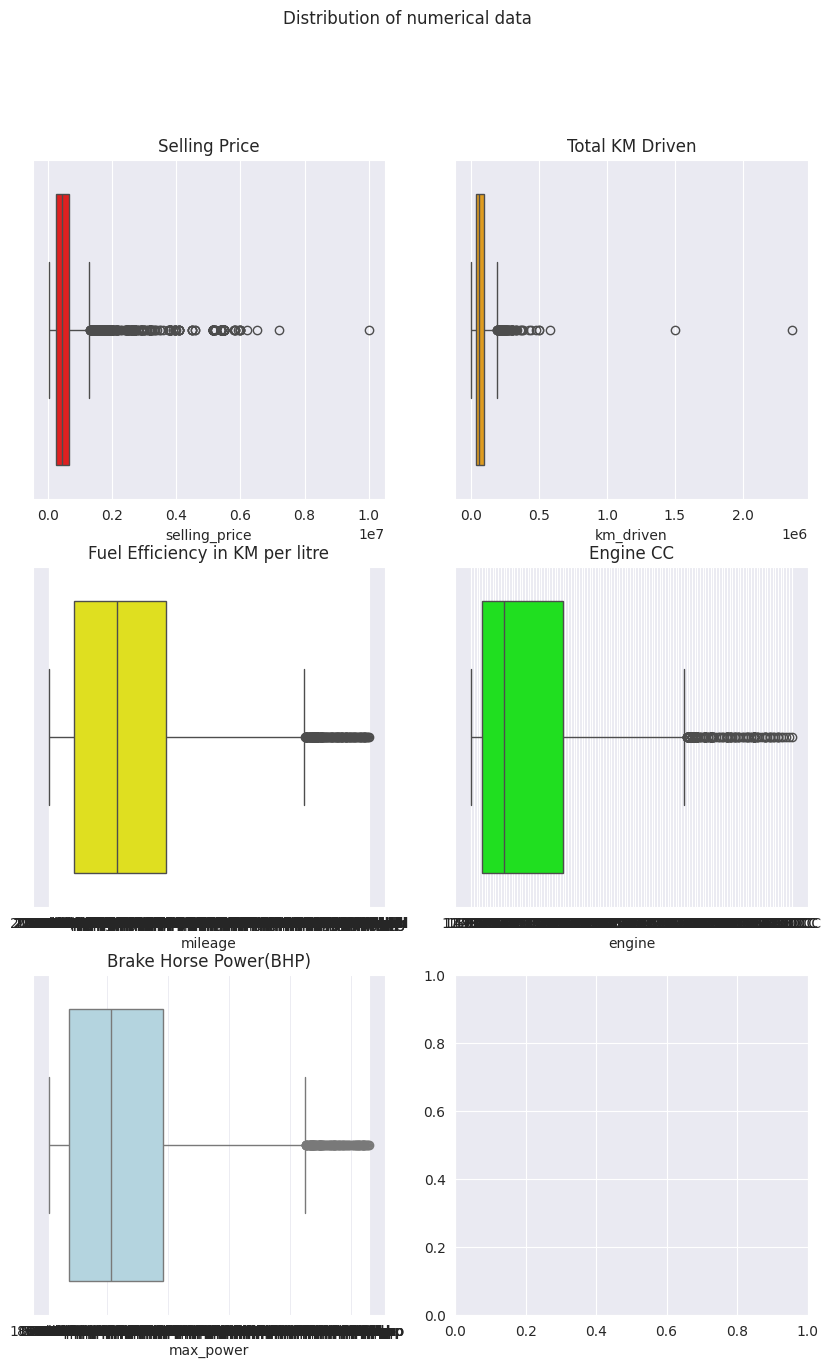

In [734]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

axes[0, 0].set_title("Selling Price")
axes[0, 1].set_title("Total KM Driven")
axes[1, 0].set_title("Fuel Efficiency in KM per litre")
axes[1, 1].set_title("Engine CC")
axes[2, 0].set_title("Brake Horse Power(BHP)")

# Строим ящик с усами для каждого числового признака
sns.boxplot(x=df_train['selling_price'], ax=axes[0, 0], color='red')
sns.boxplot(x=df_train['km_driven'], ax=axes[0, 1], color='orange')
sns.boxplot(x=df_train['mileage'], ax=axes[1, 0], color='yellow')
sns.boxplot(x=df_train['engine'], ax=axes[1, 1], color='lime')
sns.boxplot(x=df_train['max_power'], ax=axes[2, 0], color='lightblue')

fig.suptitle("Distribution of numerical data")
plt.show()

In [735]:
count_fuel = df_train['fuel'].value_counts().reset_index()
count_seller = df_train['seller_type'].value_counts().reset_index()
count_transmission = df_train['transmission'].value_counts().reset_index()
count_owner = df_train['owner'].value_counts().reset_index()
count_seats = df_train['seats'].value_counts().reset_index()

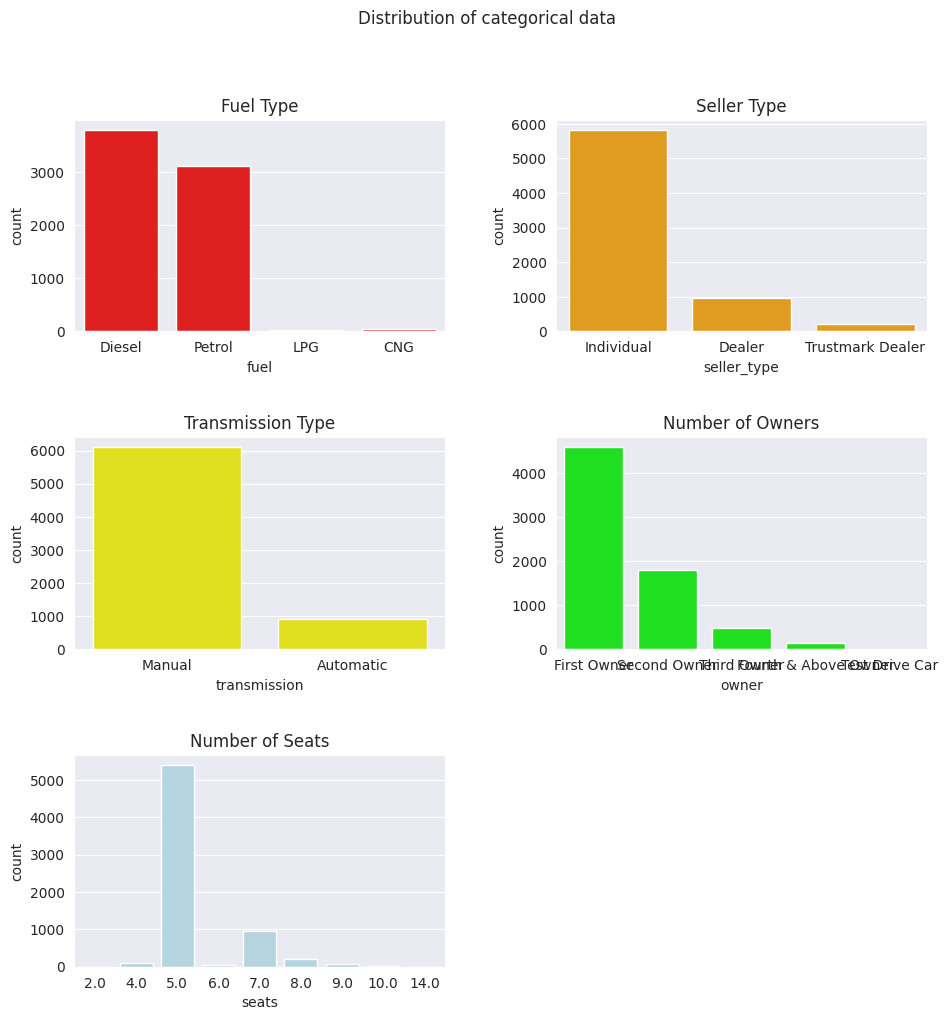

In [736]:
import adjustText 
fig, axes = plt.subplots(3, 2, figsize=(11, 11))

axes[0, 0].set_title("Fuel Type")
axes[0, 1].set_title("Seller Type")
axes[1, 0].set_title("Transmission Type")
axes[1, 1].set_title("Number of Owners")
axes[2, 0].set_title("Number of Seats")

# Строим столбчатые диаграммы для каждого категориального признака
sns.countplot(x='fuel', data=df_train, ax=axes[0, 0], color='red')
sns.countplot(x='seller_type', data=df_train, ax=axes[0, 1], color='orange')
sns.countplot(x='transmission', data=df_train, ax=axes[1, 0], color='yellow')
sns.countplot(x='owner', data=df_train, ax=axes[1, 1], color='lime')
sns.countplot(x='seats', data=df_train, ax=axes[2, 0],color='lightblue')
fig.delaxes(axes[2, 1])
fig.suptitle("Distribution of categorical data")
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

Если в данных есть выбросы, то модель может переобучиться под них, а обобщающая способность модели снизиться. На этих ящиках с усами видно, что выбросы есть в целевой переменной и в пробеге.

На совместной картинке видно, что больше всего выбросов в selling_price и km_driven

<Axes: >

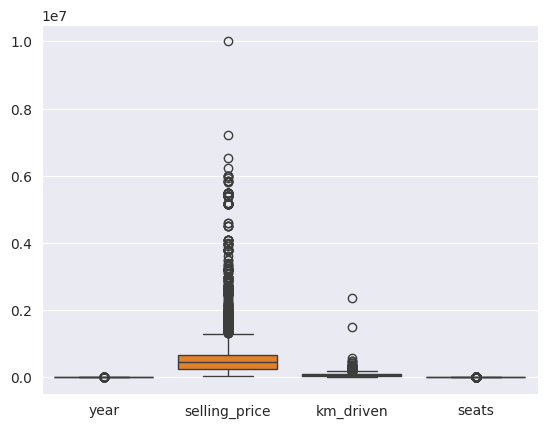

In [737]:
sns.boxplot(data = df_train)

уберем выбросы из km_driven

In [738]:
Q1 =  train_name_brand['km_driven'].quantile(0.25)
Q3 = train_name_brand['km_driven'].quantile(0.75)
IQR = Q3 - Q1
train_name_brand_noemissions = train_name_brand[(train_name_brand['km_driven'] > Q1-1.5*IQR ) & (train_name_brand['km_driven'] < Q3+1.5*IQR)]

In [739]:
# train_name_brand_noemissions

In [740]:
Q1 =  test_name_brand['km_driven'].quantile(0.25)
Q3 = test_name_brand['km_driven'].quantile(0.75)
IQR = Q3 - Q1
test_name_brand_noemissions = test_name_brand[(test_name_brand['km_driven'] > Q1-1.5*IQR ) & (test_name_brand['km_driven'] < Q3+1.5*IQR)]

In [741]:
# test_name_brand_noemissions

* можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

Попробуем посмотреть на распределение признаков

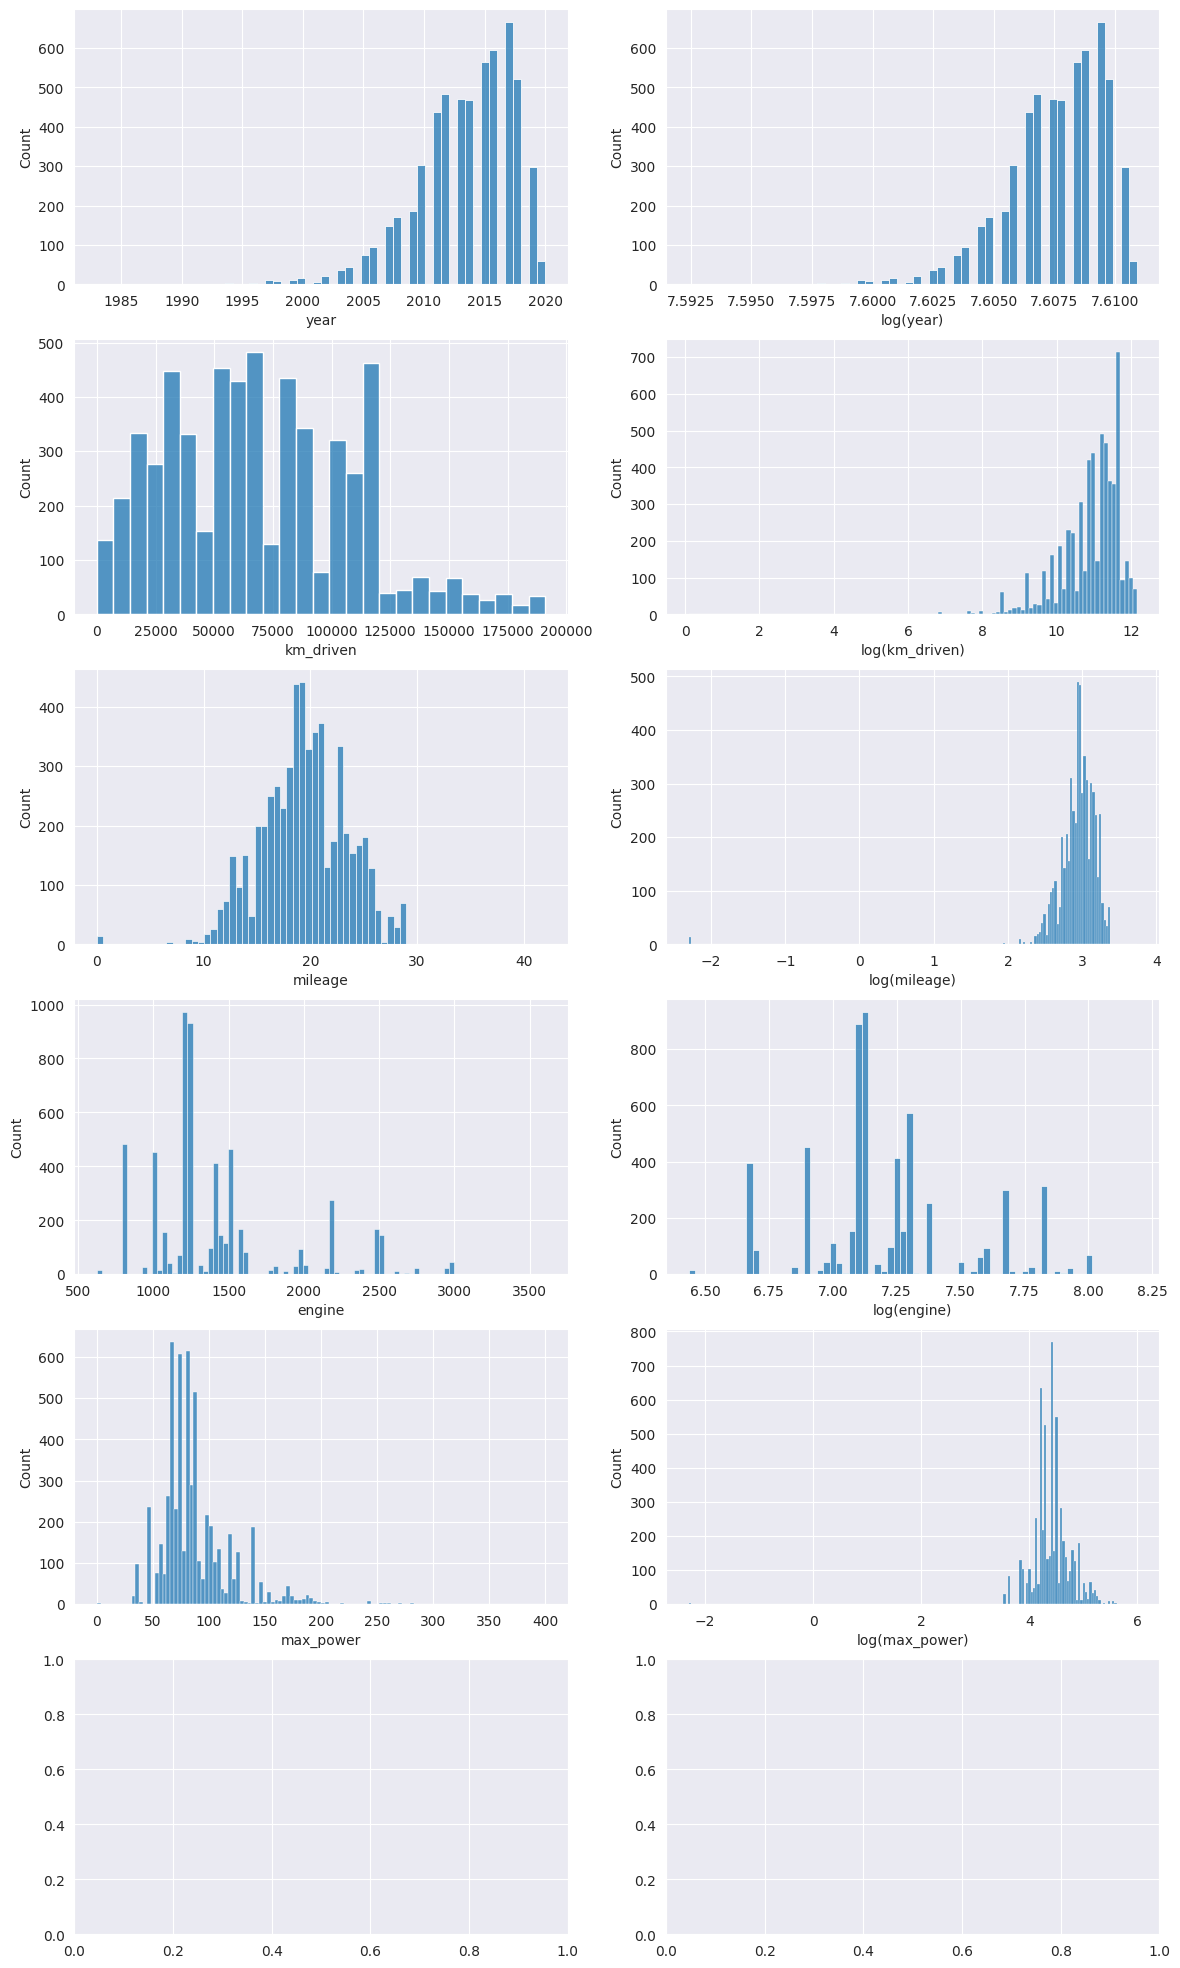

In [742]:
fig, axes = plt.subplots(6, 2, figsize=(14, 25))

for i, col in enumerate(['year', 'km_driven', 'mileage', 'engine', 'max_power']):
    sns.histplot(train_name_brand_noemissions[col], ax=axes[i, 0])

    sns.histplot(np.log(train_name_brand_noemissions[col] + 0.1), ax=axes[i, 1], label='')
    axes[i, 1].set(xlabel=f'log({col})')

plt.show()

In [743]:
for col in ['km_driven', 'max_power']:
    train_name_brand_noemissions.loc[:, col] = np.log(train_name_brand_noemissions['km_driven']+0.1)
    test_name_brand_noemissions.loc[:, col] = np.log(test_name_brand_noemissions['km_driven']+0.1)

In [744]:
# train_name_brand_noemissions

сделаем выравнивание порядка признаков

In [745]:
desired_order = train_name_brand_noemissions.columns
test_name_brand_aligned = test_name_brand_noemissions[desired_order]

In [746]:
# test_name_brand_aligned

In [747]:
# train_name_brand_noemissions

* мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить

In [748]:
y_train_new = train_name_brand_noemissions[['selling_price']].copy()
y_test_new = test_name_brand_aligned[['selling_price']].copy()
# y_test_new

In [749]:
# Логарифмируем целевую переменную
log_ytrain = np.log(y_train_new)
log_ytest = np.log(y_test_new)

In [750]:
train_name_brand_noemissions.drop(['selling_price'], axis=1, inplace=True)
# train_name_brand_noemissions

/tmp/ipykernel_7134/3455138025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_name_brand_noemissions.drop(['selling_price'], axis=1, inplace=True)


In [751]:
test_name_brand_aligned.drop(['selling_price'], axis=1, inplace=True)
# test_name_brand_aligned

/tmp/ipykernel_7134/363047889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_name_brand_aligned.drop(['selling_price'], axis=1, inplace=True)


Проведем стандартизацию признаков

In [752]:
ss = StandardScaler()

train_cat_scaled = ss.fit_transform(train_name_brand_noemissions)
test_cat_scaled = ss.transform(test_name_brand_aligned)

X_train_final = pd.DataFrame(train_cat_scaled, columns=train_name_brand_noemissions.columns)
X_test_final = pd.DataFrame(test_cat_scaled, columns=test_name_brand_aligned.columns)

In [753]:
train_cat_scaled.shape

(5698, 53)

In [754]:
test_cat_scaled.shape

(911, 53)

In [755]:
log_ytrain.shape # ПОПРАВИТЬ РАЗМЕР ЦЕЛЕВОЙ ПЕРЕМЕННОЙ!!!!!!

(5698, 1)

In [756]:
log_ytest.shape

(911, 1)

In [757]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Создаем модель Ridge-регрессии
ridge_model = Ridge()

# Определяем параметры для перебора
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 5000, 10000, 15000, 20000, 24000]}

# Создаем объект GridSearchCV
grid_search_ridge = GridSearchCV(ridge_model, param_grid, cv=10, scoring=make_scorer(r2_score))

# Запускаем подбор параметров
grid_search_ridge.fit(X_train_final, log_ytrain)

# Выводим лучшие параметры
print("Лучшие параметры:", grid_search_ridge.best_params_)

# Получаем лучшую модель
best_ridge_model = grid_search_ridge.best_estimator_
# Получаем предсказания для тренировочных данных
y_train_pred_ridge = best_ridge_model.predict(X_train_final)

# Получаем предсказания для тестовых данных
y_test_pred_ridge = best_ridge_model.predict(X_test_final)

# Вычисляем R^2 для тренировочных данных
r2_train_ridge = r2_score(log_ytrain, y_train_pred_ridge)

# Вычисляем R^2 для тестовых данных
r2_test_ridge = r2_score(log_ytest, y_test_pred_ridge)

# Вычисляем MSE для тренировочных данных
mse_train_ridge = MSE(log_ytrain, y_train_pred_ridge)

# Вычисляем MSE для тестовых данных
mse_test_ridge = MSE(log_ytest, y_test_pred_ridge)

# Выводим результаты
print(f'R^2 на тренировочных данных (Ridge): {r2_train_ridge}')
print(f'R^2 на тестовых данных (Ridge): {r2_test_ridge}')
print(f'MSE на тренировочных данных (Ridge): {mse_train_ridge:}')
print(f'MSE на тестовых данных (Ridge): {mse_test_ridge}')

Лучшие параметры: {'alpha': 100}
R^2 на тренировочных данных (Ridge): 0.8897325169359513
R^2 на тестовых данных (Ridge): 0.9102564233167204
MSE на тренировочных данных (Ridge): 0.06465492409991438
MSE на тестовых данных (Ridge): 0.05891138212555505


Вывод: качество модели значительно улучшилось после feature engineering.

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

переведем в Dataframe объект формата numpy.ndarray

In [758]:
y_test_pred_ridge_frame = pd.DataFrame(y_test_pred_ridge)
# y_test_pred_ridge_frame # предсказания для тестовых данных для лучшей модели

In [759]:
# реальные цены
# log_ytest

In [760]:
y_test_pred_ridge_frame = y_test_pred_ridge_frame.rename(columns={0:'selling_price'})
# y_test_pred_ridge_frame # приведем колонки к одному названию для избежания ошибок

In [761]:
# обновим индексы для обоих датафреймов
dataframe_real = log_ytest.reset_index(drop=True)
dataframe_pred = y_test_pred_ridge_frame.reset_index(drop=True)

In [762]:
def custom_metrics(y_true, y_pred):
    # Вычисление абсолютного отклонения
    absolute_deviation = np.abs(y_true - y_pred)
    
    # Оценка отклонений в пределах 10%
    within_10_percent = absolute_deviation <= 0.1 * y_true
    
    # Рассчет доли предсказаний в пределах 10%
    percentage_within_10_percent = within_10_percent.sum() / len(y_true) * 100
    
    return percentage_within_10_percent

result = custom_metrics(dataframe_real, dataframe_pred)
print(f'Percentage within 10%: {result:}%')

Percentage within 10%: selling_price    100.0
dtype: float64%


Вывод: по результатам расчета кастомной метрики обнаружено, что все предсказанные цены на автомобили оказались в пределах 10% от реальных цен. Это говорит о высокой точности модели в предсказании цен на автомобили с учетом указанного диапазона.

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [763]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link